HomeWork 2 - Baseball Teams and Restaurants inspections

Lex Brunett
Modern Data Science - DSCI401

Homework should be submitted as an R Markdown file with links to Google
colab notes where necessary. Homework should be turned in on Sakai.

Import Pandas and preparing the dataframes from the CVS files before begining the homework

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math as mt
import datetime


Teams_Lahman = pd.read_csv("https://raw.githubusercontent.com/gjm112/DSCI401/main/data/Teams.csv")

In [ ]:
Violations_MSDR = pd.read_csv("/content/Violations.csv")

In [ ]:
Teams = pd.DataFrame(data=Teams_Lahman)
Violations = pd.DataFrame(data=Violations_MSDR)


(a) (10 points) Create a data frame that is a subset of the Teams data
frame that contains only the years from 2000 through 2009 and the
variables yearID, W, and L.

In [ ]:
first_Question_Teams = Teams.loc[(Teams["yearID"]>= 2000) & (Teams["yearID"]<= 2009),["yearID", "W", "L"]]
print(first_Question_Teams)

      yearID   W    L
2325    2000  82   80
2326    2000  85   77
2327    2000  95   67
2328    2000  74   88
2329    2000  85   77
...      ...  ..  ...
2620    2009  91   71
2621    2009  84   78
2622    2009  87   75
2623    2009  75   87
2624    2009  59  103

[300 rows x 3 columns]


hjk

(10 points) How many years did the Chicago Cubs (teamID is “CHN”)
hit at least 200 HRs in a season and what was the median number
of wins in those seasons.


In [ ]:
ChicagoCubs = Teams.loc[(Teams["teamID"]== "CHN") & (Teams["HR"] >= 200), ["yearID", "HR", "W"]]

years = 0
for x in ChicagoCubs['yearID']:
  years+=1

print(years)
print(ChicagoCubs["W"].median())

7
84.0


The chicago Cubs hit at least 200 HRs in a season during 7 years, in the other hand the median number of the wins in those seasons were 84 wins.

(10 points) Create a factor called election that divides the yearID
into 4-year blocks that correspond to U.S. presidential terms. The
first presidential term started in 1788. They each last 4 years and are
still on the schedule set in 1788. During which term were the most
home runs been hit?

In [ ]:
Top_Year = Teams["yearID"][Teams["HR"].idxmax()]


total_terms = mt.floor(((datetime.date.today().year) - 1788)/4)
print(total_terms)

term_year = 1789 + 4
term_number = 0
Top_Term = 0

for x in range(total_terms):
  if (Top_Year >= term_year):
    term_number+=1
    term_year = term_year + 4
  else:
    print("The most Homeruns hit occured during the {} st term, specifically in {}.".format(term_number, term_year))





58
The most Homeruns hit occured during the 57 st term, specifically in 2021.


(d) (10 points) Make a line plot of total home runs per season and stratify
by league. Remove observations where league is missing.


array([<Axes: xlabel='yearID'>, <Axes: xlabel='yearID'>,
       <Axes: xlabel='yearID'>, <Axes: xlabel='yearID'>,
       <Axes: xlabel='yearID'>, <Axes: xlabel='yearID'>], dtype=object)

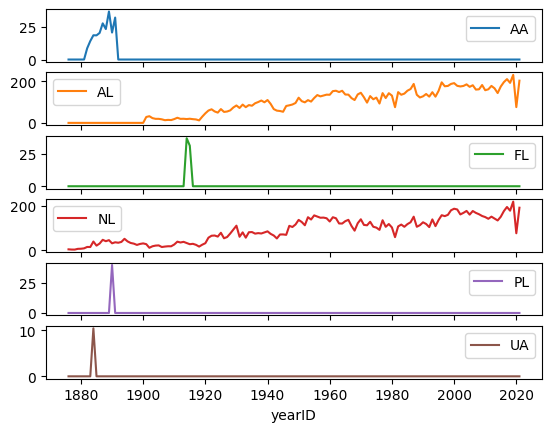

In [ ]:
pd.pivot_table(Teams.reset_index(),index='yearID', columns='lgID', values='HR',fill_value=0).plot(subplots=True)

(e) (10 points) Create an indicator variable called “winning record” which
is defined as TRUE if the number of wins is greater than the number
of losses and FALSE otherwise. Plot a scatter plot of Runs (R) vs
Runs against (RA) with the color of each point showing whether that
team had a winning record or not.


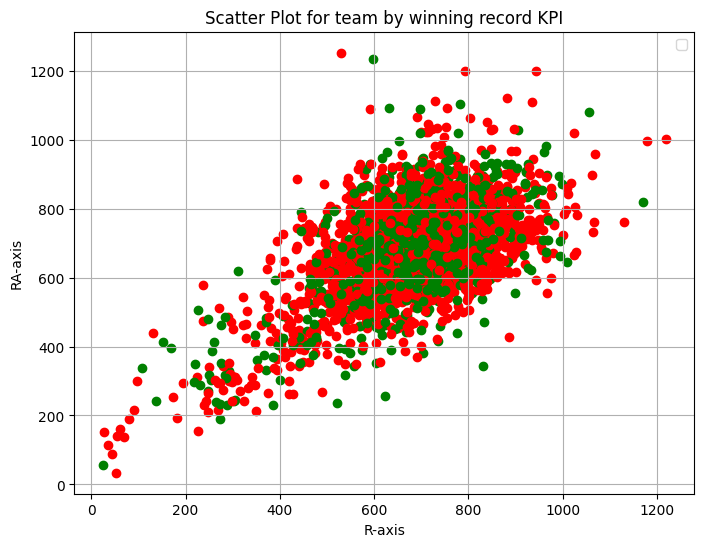

In [ ]:
winning_record_teams = []
color = []
teams_set = list(set(Teams["teamID"]))

for x in range(len(teams_set)):
  win = ""
  one_team = Teams.loc[(Teams["teamID"]== teams_set[x]), ["teamID","W", "L"]]
  win = one_team["W"].sum() > one_team["L"].sum()
  winning_record_teams.append(win)

  x += 1

for x in winning_record_teams:
  if ( x == True):
    x= "g"
    color.append(x)
  else:
    x = "r"
    color.append(x)

# Create a scatter plot with colored points
plt.figure(figsize=(8, 6))

for i in range(len(color)):
  one_team = Teams.loc[(Teams["teamID"]== teams_set[i]), ["teamID","R", "RA"]]
  plt.scatter(one_team["R"], one_team["RA"], c=color[i-1])

plt.xlabel('R-axis')
plt.ylabel('RA-axis')
plt.title('Scatter Plot for team by winning record KPI')
plt.legend()
plt.grid(True)
plt.show()

(a) (10 points) What proportion of inspections in each boron were given
a grade of A? (Missing values should be counted as not and A grade.)

In [ ]:
quantity_violations = []
quantity_inspections = []
Violations["GRADE"] = Violations["GRADE"].fillna(0)

Inspection = Violations.loc[(Violations["GRADE"]== "A"), ["BORO", "GRADE"]]

inspection_set = list(set((Inspection["BORO"])))
boro_set = list(set(Violations["BORO"]))[:-1]

total_inspection, c = Violations.shape

for x in range(len(inspection_set)):
  one_Inspection = Inspection.loc[(Inspection["BORO"]== inspection_set[x]), ["GRADE"]]
  r, c = one_Inspection.shape
  quantity_inspections.append(r)


for x in range(len(boro_set)):
  poportion = round((100* quantity_inspections[x]/total_inspection),2)
  print(" {} %  {}".format(poportion, boro_set[x]))


 4.58 %  Bronx
 13.92 %  Brooklyn
 1.49 %  Staten Island
 11.96 %  Queens
 18.55 %  Manhattan


(b) (20 points) Find the top ten dba’s with the most number of inspections. Then compute the average score for each of these dba’s and
sort by mean score. Which of these top 10 had the lowest average
inspection score?

In [ ]:
#Quantity of inspectionsa based by DBA
inspections_DBA = Violations["DBA"].value_counts(sort=True, ascending = False).head(10)
#Filtering the dataframe with the conditions given
df_top_10 = Violations[Violations["DBA"].isin(inspections_DBA.index)]

dba = list(set(df_top_10["DBA"]))
mean_list = []
#for loop for obtaining the mean based on the DBA
for x in range(len(dba)):
  one_dba = df_top_10.loc[(df_top_10["DBA"]== dba[x]), ["SCORE"]]
  one_mean = one_dba["SCORE"].mean()
  mean_list.append([dba[x],one_mean])
  x+=1

dba_mean_df = pd.DataFrame(data = mean_list)
print(dba_mean_df.sort_values(1))

                                       0          1
3                              STARBUCKS  11.797784
1                                DUNKIN'  12.575835
5                                 DUNKIN  13.490412
2                             MCDONALD'S  13.728745
9                                POPEYES  14.772581
7                            BURGER KING  15.548276
4                                 SUBWAY  17.238816
6  GOLDEN KRUST CARIBBEAN BAKERY & GRILL  19.864924
0                    CROWN FRIED CHICKEN  24.115646
8                  KENNEDY FRIED CHICKEN  24.405970


(c) (20 points) Use these data to calculate the median violation score
by zip code for zip codes in Manhattan with 50 or more inspections.
What pattern do you see between the number of inspections and the
median score?


In [ ]:
#Counting how many inspections based by zipcode with the condition given
inspections_zipcode = Violations["ZIPCODE"].value_counts(sort=True, ascending = False)
inspections_zipcode = inspections_zipcode[inspections_zipcode >= 50]
#Filtering the dataframe based on the condition given before
inspections_zipcode = Violations[Violations["ZIPCODE"].isin(inspections_zipcode.index)]
#Adjusting and using the variables we need for the exercise
inspections_zipcode = inspections_zipcode.loc[(inspections_zipcode["BORO"]== "Manhattan"), ["DBA","SCORE", "ZIPCODE"]]
#Obtaining the quantity of zipcodes for the for loop
zipcode = list(set(inspections_zipcode["ZIPCODE"]))
median_list = []

for x in range(len(zipcode)):
  one_zipcode = inspections_zipcode.loc[(inspections_zipcode["ZIPCODE"]== zipcode[x]), ["SCORE"]]
  one_median = one_zipcode["SCORE"].median()
  median_list.append([zipcode[x],one_median])
  x+=1

dba_mean_df = pd.DataFrame(data = median_list)
print(dba_mean_df.sort_values(1))

          0     1
49  11371.0  11.0
2   10121.0  11.0
44  10169.0  12.0
33  10281.0  12.0
23  10020.0  12.0
31  10028.0  13.0
29  10280.0  13.0
22  10019.0  13.0
20  10017.0  13.0
12  10006.0  13.0
0   10112.0  13.0
11  10007.0  14.0
1   10119.0  14.0
39  10036.0  14.0
24  10021.0  14.0
47  10065.0  15.0
25  10022.0  15.0
9   10005.0  16.0
34  10031.0  16.0
5   10001.0  16.0
16  10012.0  17.0
41  10038.0  17.0
21  10018.0  17.0
15  10011.0  18.0
45  10039.0  18.0
14  10010.0  18.0
30  10027.0  18.0
7   10003.0  18.0
26  10023.0  18.0
18  10014.0  18.0
8   10004.0  18.0
19  10016.0  18.0
27  10024.0  19.0
10  10282.0  19.0
6   10002.0  19.0
3   10026.0  19.0
37  10034.0  19.0
46  10044.0  20.0
36  10033.0  20.0
13  10009.0  20.0
28  10025.0  21.0
17  10013.0  21.0
35  10032.0  21.0
38  10035.0  22.0
42  10030.0  22.0
32  10029.0  22.0
40  10037.0  23.0
4   10128.0  23.0
48  10075.0  23.0
43  10040.0  23.0


The main pattern seen between the inspections numbers and the median is that most of the zipcodes have at least more than 10 points in the score, that means that having more than 50 inspections with 10 point as median value means that most of these restaurants passed through 10 points and they complete actions to improve a achieve better score.